In [1]:
# Importing necessary libraries

# Manipulation of Data
import pandas as pd
import seaborn as sns

# Plotting
import matplotlib.pyplot as plt

# Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Standardization
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import silhouette_score

# Reduction  DimensionalitY
from sklearn.decomposition import PCA




In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Displaying the first few rows of the dataset
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [4]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Summary statistics
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [6]:
# Checking for missing values
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


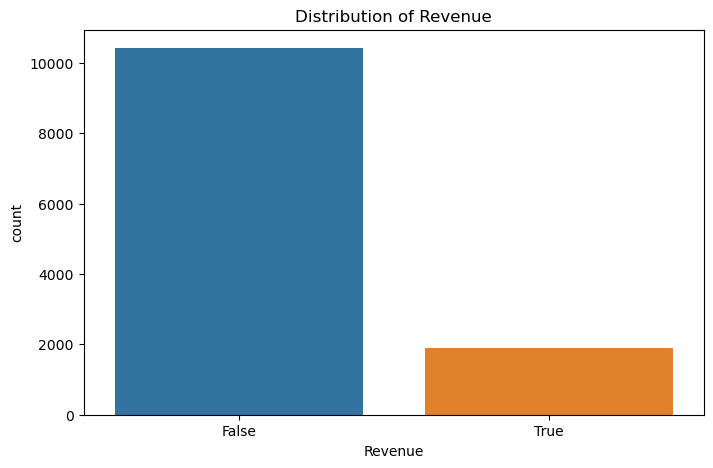

In [7]:
# Visualizing the distribution of the dependent variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=df)
plt.title('Distribution of Revenue')
plt.show()

C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

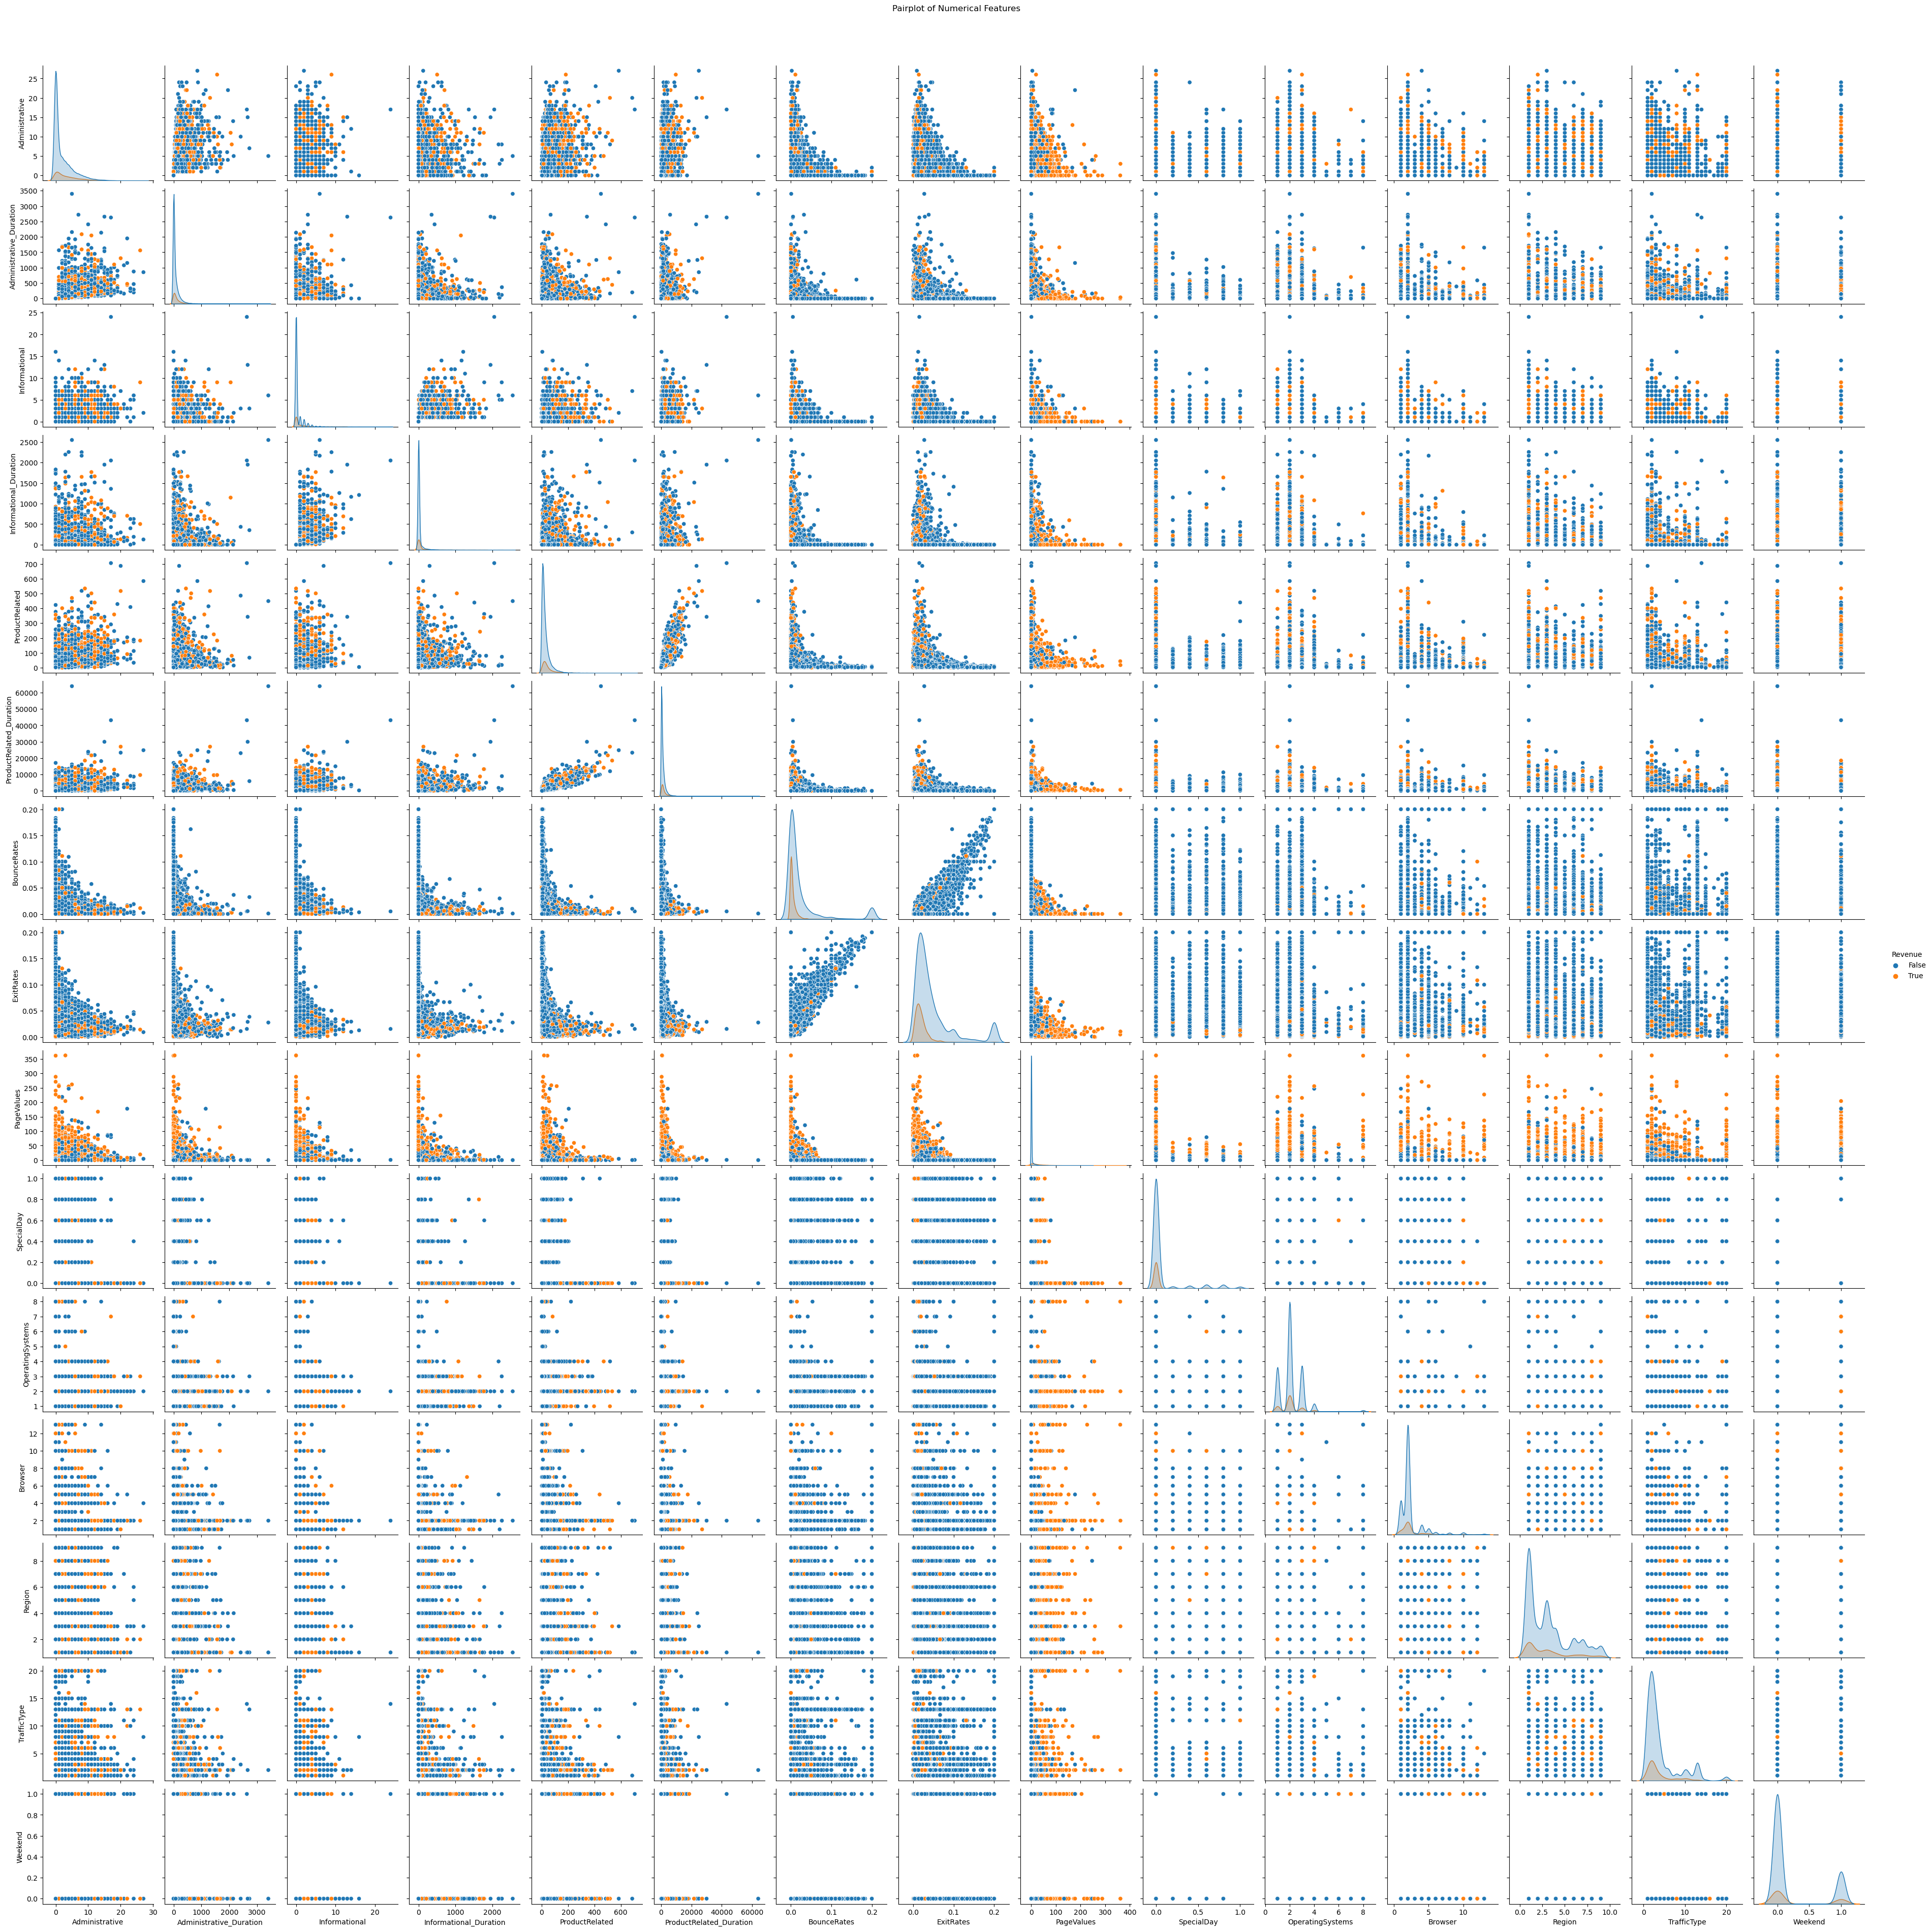

In [8]:
# Visualizing the distribution of numerical features
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Revenue')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [9]:
# Droppin irrelevant features for clustering (excluding non-numeric and target variables)
features = df.drop(['Month', 'VisitorType', 'Weekend', 'Revenue'], axis=1)
features

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0                 1   
1         0.000000   0.100000    0.000000         0.0                 2   
2         0.200000   0.200000    0.000000         0.0                 4   
3         0.050000   0.140000    0.000000         0.0                 3   
4         0.020000   0.050000    0.000000         0.0                 3   
...            ...        ...         ...         ...               ...   
12325     0.007143   0.029031   12.241717         0.0                 4   
12326     0.000000   0.021333    0.000000         0.0                 3   
12327     0.083333   0.086667    0.000000         0.0                 3   
12328     0.000000   0.021053    0.000000         0.0                 2   
12329     0.000000   0.066667    0.000000         0.0                 3   

       Browser  Region  TrafficType  
0            1       1            1  
1            2       1            2  
2            1       9            3  
3            2       2            4  
4            3       1            4  
...        ...     ...          ...  
12325        6       1            1  
12326        2       1            8  
12327        2       1           13  
12328        2       3           11  
12329        2       1            2  

[12330 rows x 14 columns]

In [10]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled 

array([[-0.69699296, -0.4571914 , -0.3964779 , ..., -0.79029289,
        -0.89417849, -0.76262903],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849, -0.51418219],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.79029289,
         2.43708134, -0.26573535],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849,  2.21873304],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.20795193,
        -0.06136354,  1.72183936],
       [-0.69699296, -0.4571914 , -0.3964779 , ..., -0.20795193,
        -0.89417849, -0.51418219]])

C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_

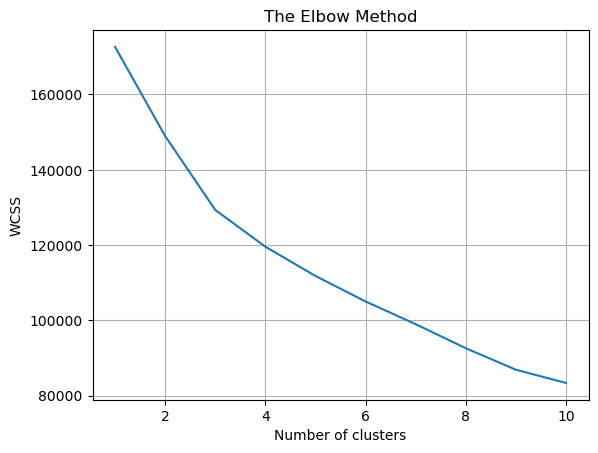

In [11]:
# Finding the optimal number of clusters and Creating an empty list wcss = []

wcss = []
 
# Creating 10 clusters using a for loop
for i in range(1, 11):
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=i, random_state=0)
    # Fit model to samples
    kmeans.fit(features_scaled)
    # Append the inertia to the list of inertias
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
# Applying K-Means Clustering by Creating a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3, random_state=0)

In [13]:
# fitting K-Means Clustering into the dataset
model.fit(features_scaled)

C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [14]:
# Determining the cluster labels of new_points: labels
labels = model.predict(features_scaled)
print(labels)

[2 1 2 ... 1 1 1]


In [15]:
# Showing the cluster centers
print(model.cluster_centers_)

[[ 1.51692105e+00  1.28405388e+00  1.59681594e+00  1.26980508e+00
   1.46194427e+00  1.37703349e+00 -3.28004770e-01 -4.86175518e-01
   2.06178639e-01 -1.59700372e-01 -1.45258791e-02 -7.96577334e-02
  -9.13448739e-02 -1.15444127e-01]
 [-1.80831393e-01 -1.67118147e-01 -2.26935382e-01 -1.87121471e-01
  -1.75740277e-01 -1.66857026e-01 -2.69114428e-01 -2.26492817e-01
  -4.32811573e-05  1.32673557e-05 -4.16908254e-03  1.59928723e-02
   1.95015027e-02 -6.21782667e-03]
 [-6.82439582e-01 -4.49191877e-01 -3.83790962e-01 -2.44275892e-01
  -6.44327743e-01 -5.94795374e-01  2.96678861e+00  2.82056009e+00
  -3.17177844e-01  2.45862630e-01  6.05082465e-02 -2.35899539e-02
  -3.76815933e-02  2.34690744e-01]]


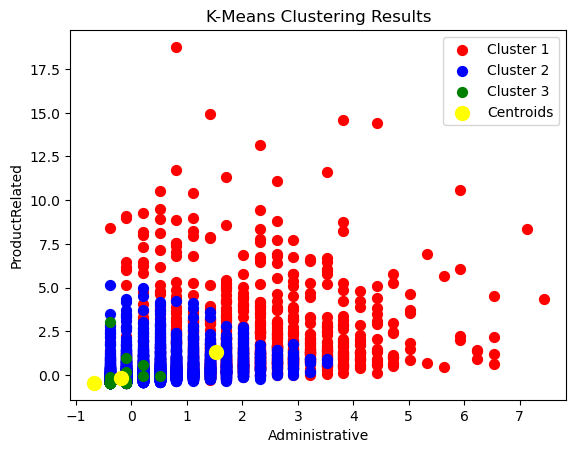

In [16]:
# Plotting the clusters
plt.scatter(features_scaled[labels == 0, 0], features_scaled[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(features_scaled[labels == 1, 0], features_scaled[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(features_scaled[labels == 2, 0], features_scaled[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Administrative')
plt.ylabel('ProductRelated')
plt.legend()
plt.show()

In [17]:
# Applying Principal Component Analysis (PCA) by creating a PCA instance with 2 components: model
model = PCA(n_components=2)

In [18]:
# Apply the fit_transform method of model to dataset_scaled: pca_features
pca_features = model.fit_transform(features_scaled)

In [19]:
# Assigning 0th column of pca_features: xs
xs = pca_features[:, 0]

In [20]:
# Assigning 1st column of pca_features: ys
ys = pca_features[:, 1]

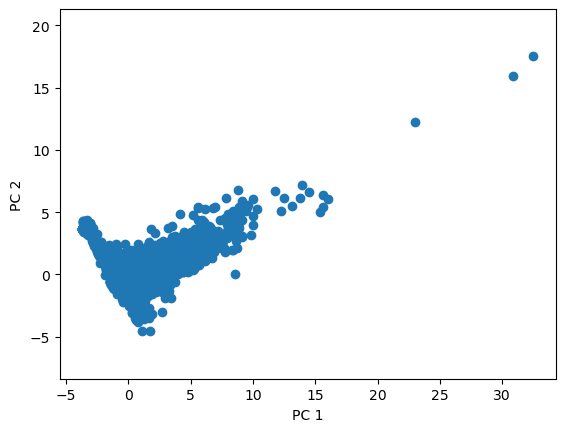

In [21]:
# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
# Label the axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Show the plot
plt.show()

In [22]:
# Applying K-Means Clustering by creating a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3, random_state=0)


In [23]:
# Fitting the model to points
model.fit(pca_features)

C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [24]:
# Determining the cluster labels of new_points: labels
labels = model.predict(pca_features)
print(labels)

[1 2 1 ... 1 2 2]


In [25]:
# Showing the cluster centers
print(model.cluster_centers_)

[[ 3.47446895  1.06529665]
 [-2.87162564  2.9651252 ]
 [-0.22620014 -0.50922473]]


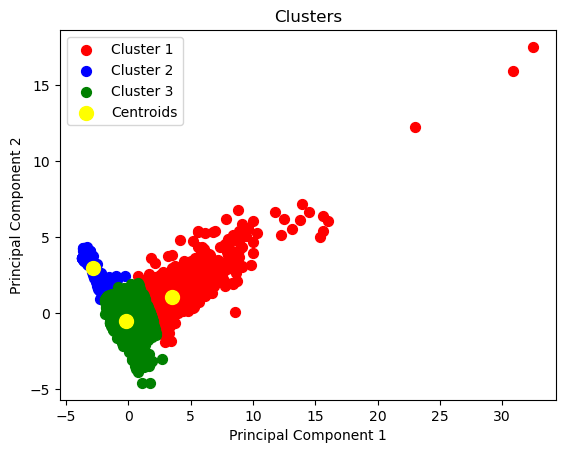

In [26]:
# Plotting the clusters
plt.scatter(pca_features[labels == 0, 0], pca_features[labels == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(pca_features[labels == 1, 0], pca_features[labels == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(pca_features[labels == 2, 0], pca_features[labels == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

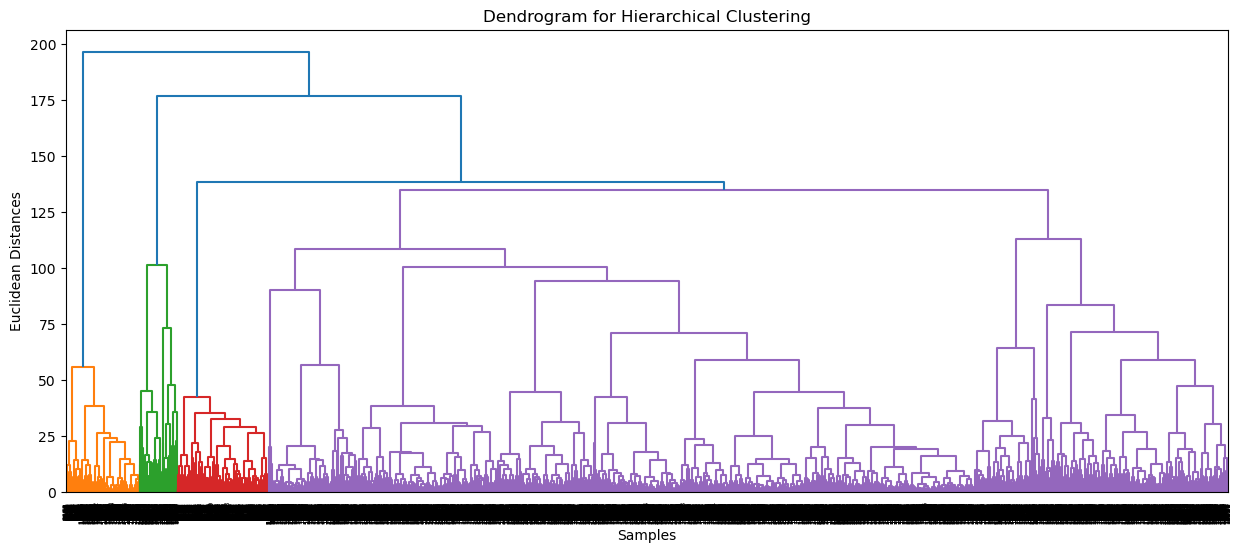

In [27]:
# Hierarchical Clustering with PCA
# Ploting the dendrogram to identify the optimal number of clusters.

plt.figure(figsize=(15,6))
dendrogram = sch.dendrogram(sch.linkage(features_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distances')
plt.show()

In [28]:
# Create a Hierarchical Clustering model with 14 clusters
hc = AgglomerativeClustering(n_clusters=14, affinity='euclidean', linkage='ward')

In [29]:
# Fitting and predictting the clusters
y_hc = hc.fit_predict(pca_features)
y_hc

C:\Users\SDP651\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([11,  8, 11, ...,  3,  0,  8], dtype=int64)

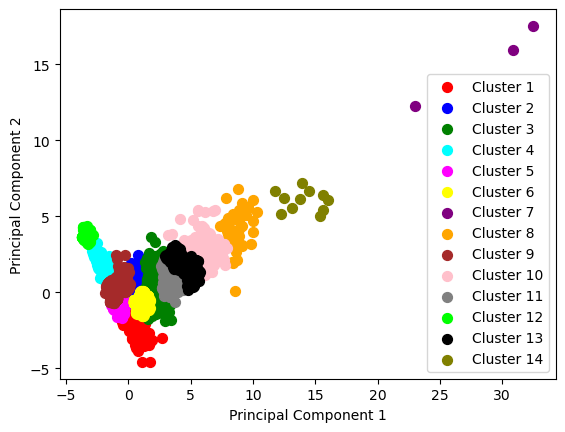

In [30]:
# Plot the clusters for 14 clusters
plt.scatter(pca_features[y_hc == 0, 0], pca_features[y_hc == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(pca_features[y_hc == 1, 0], pca_features[y_hc == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(pca_features[y_hc == 2, 0], pca_features[y_hc == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(pca_features[y_hc == 3, 0], pca_features[y_hc == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(pca_features[y_hc == 4, 0], pca_features[y_hc == 4, 1], s=50, c='magenta', label='Cluster 5')
plt.scatter(pca_features[y_hc == 5, 0], pca_features[y_hc == 5, 1], s=50, c='yellow', label='Cluster 6')
plt.scatter(pca_features[y_hc == 6, 0], pca_features[y_hc == 6, 1], s=50, c='purple', label='Cluster 7')
plt.scatter(pca_features[y_hc == 7, 0], pca_features[y_hc == 7, 1], s=50, c='orange', label='Cluster 8')
plt.scatter(pca_features[y_hc == 8, 0], pca_features[y_hc == 8, 1], s=50, c='brown', label='Cluster 9')
plt.scatter(pca_features[y_hc == 9, 0], pca_features[y_hc == 9, 1], s=50, c='pink', label='Cluster 10')
plt.scatter(pca_features[y_hc == 10, 0], pca_features[y_hc == 10, 1], s=50, c='grey', label='Cluster 11')
plt.scatter(pca_features[y_hc == 11, 0], pca_features[y_hc == 11, 1], s=50, c='lime', label='Cluster 12')
plt.scatter(pca_features[y_hc == 12, 0], pca_features[y_hc == 12, 1], s=50, c='black', label='Cluster 13')
plt.scatter(pca_features[y_hc == 13, 0], pca_features[y_hc == 13, 1], s=50, c='olive', label='Cluster 14')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [31]:
# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(features_scaled, labels)
print(f"Silhouette Score for K-Means Clustering: {kmeans_silhouette}")


Silhouette Score for K-Means Clustering: 0.3150588155104422


In [32]:
# Evaluate Hierarchical Clustering
hc_silhouette = silhouette_score(pca_features, y_hc)
print(f"Silhouette Score for Hierarchical Clustering: {hc_silhouette}")

Silhouette Score for Hierarchical Clustering: 0.3270076684476894


In [35]:
import scikitplot as skplt


In [36]:
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)

NameError: name 'labels_true' is not defined